# Use case: predict best price for VW Passat B6 TDI basing on real offers

### Settings

In [1]:
percent_of_test_data = 33
main_url = 'https://www.otomoto.pl/osobowe/volkswagen/passat/b6-2005-2010/?search%5Bfilter_float_price%3Afrom%5D=5000&search%5Bfilter_float_price%3Ato%5D=50000&search%5Bfilter_enum_fuel_type%5D%5B0%5D=diesel&search%5Bfilter_enum_damaged%5D=0&search%5Bfilter_enum_rhd%5D=0&search%5Border%5D=filter_float_price%3Aasc&search%5Bcountry%5D='

### Prepare environment

In [2]:
import sys
sys.path.append('/Users/tomek/OneDrive/Projects/Machine Learning/car-price-prediction')

import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import car_price_prediction

plt.rcParams['figure.figsize'] = 14,5

### Count pages with offers

In [3]:
pages = car_price_prediction.count_pages(main_url)
print("Found %d pages" % pages)

Found 41 pages


### Collect samples from those offers

In [4]:
Xy = car_price_prediction.collect_data(main_url,pages)

print("Collected %d samples" % len(Xy))
#print(Xy.shape)
print("\nLast 10 samples:")
print("[year, mileage, capacity, price]")
np.set_printoptions(precision=0)
print(Xy[-10:])

	Parsing page: 1

	Parsing page: 2

	Parsing page: 3

	Parsing page: 4

	Parsing page: 5

	Parsing page: 6

	Parsing page: 7

	Parsing page: 8

	Parsing page: 9

	Parsing page: 10

	Parsing page: 11

	Parsing page: 12

	Parsing page: 13

	Parsing page: 14

	Parsing page: 15

	Parsing page: 16

	Parsing page: 17

	Parsing page: 18

	Parsing page: 19

	Parsing page: 20

	Parsing page: 21

	Parsing page: 22

	Parsing page: 23

	Parsing page: 24

	Parsing page: 25

	Parsing page: 26

	Parsing page: 27

	Parsing page: 28

	Parsing page: 29

	Parsing page: 30

	Parsing page: 31

	Parsing page: 32

	Parsing page: 33

	Parsing page: 34

	Parsing page: 35

	Parsing page: 36

	Parsing page: 37

	Parsing page: 38

	Parsing page: 39

	Parsing page: 40

	Parsing page: 41



Collected 1135 samples

Last 10 samples:
[year, mileage, capacity, price]
[[   2009.  140000.    1996.   30500.]
 [   2008.  196000.    1968.   30900.]
 [   2009.  295000.    2000.   30900.]
 [   2009.  200000.    1968.   30900.]
 [   2010.  291000.    1968.   32000.]
 [   2007.  166000.    1968.   32000.]
 [   2010.  170000.    1600.   32500.]
 [   2010.  220000.    1968.   37900.]
 [   2009.  222327.    2000.   39900.]
 [   2009.  191000.    1986.   43000.]]


## Let's have some fun with that data

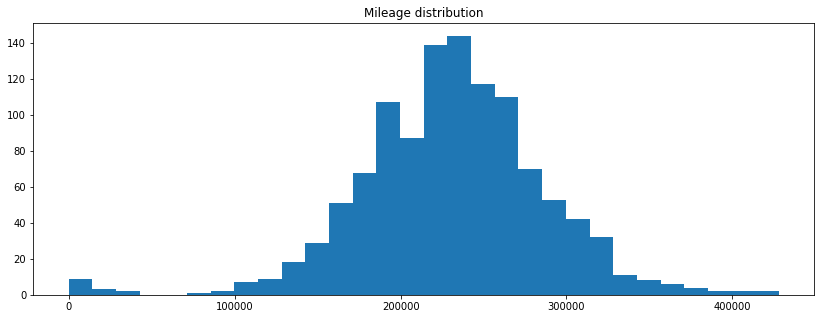

In [5]:
plt.figure()
plt.hist(Xy[:,1],30)
plt.title("Mileage distribution")
plt.show()

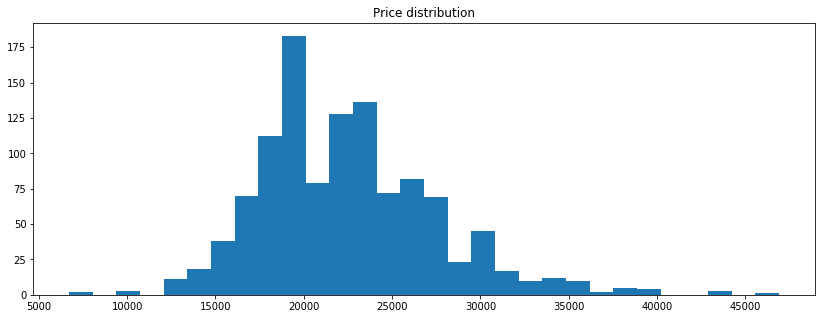

In [6]:
plt.figure()
plt.hist(Xy[:,3],30)
plt.title("Price distribution")
plt.show()

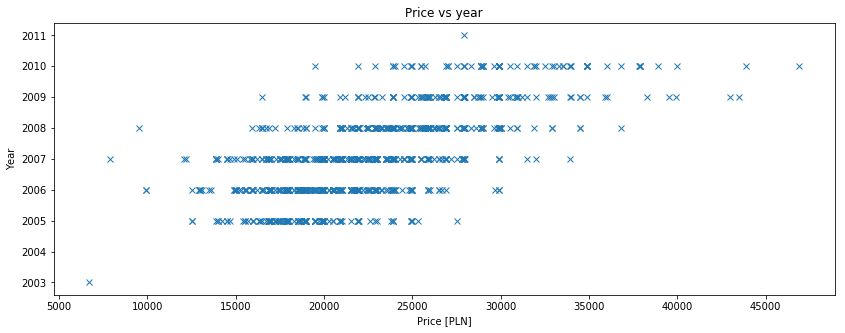

In [7]:
plt.figure()
plt.title("Price vs year")
plt.xlabel("Price [PLN]")
plt.ylabel("Year")
plt.plot(Xy[:,3],Xy[:,0],"x")
plt.show()

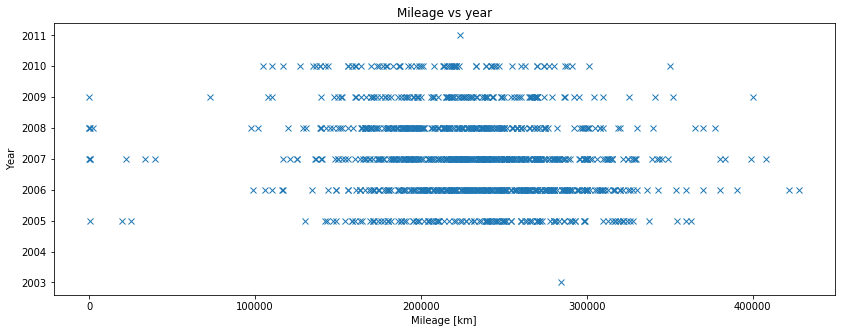

In [8]:
plt.figure()
plt.title("Mileage vs year")
plt.xlabel("Mileage [km]")
plt.ylabel("Year")
plt.plot(Xy[:,1],Xy[:,0],"x")
plt.interactive(False)
plt.show()


### Divide samples to train and test

In [9]:
X_train, y_train, X_test, y_test = car_price_prediction.split_data(Xy, percent_of_test_data) 

print('Training samples: %d' % len(X_train))
print('Test samples: %d' % len(X_test))


Training samples: 760
Test samples: 375


### Let's train!

In [10]:
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train, y_train)

np.set_printoptions(formatter={'float_kind': '{:f}'.format})
print('Interceptor: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

Interceptor:  [-4553285.093221]
Coefficients:  [[2282.023288 -0.019542 -0.012544]]


@see my [Desmos calculator](https://www.desmos.com/calculator/rr4aec66bf)

### Let's test

In [11]:
y_pred = regr.predict(X_test)

#print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.51


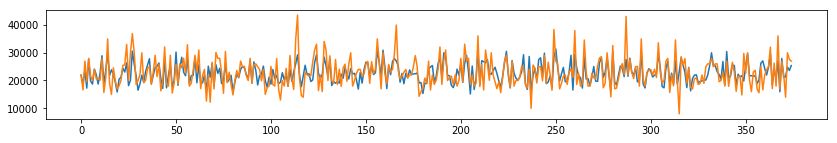

In [12]:

plt.figure(figsize=(14,2))
plt.plot(y_pred, label="Predicted")
plt.plot(y_test, label="Real")
plt.show()


## What is the best price for... 

### Passat B6 1.9 TDI 2009 with 188 000 mileage

 - 1.6 = 1598
 - 1.9 = 1896
 - 2.0 = 1968

In [13]:
price_pred = regr.predict([[2009,180000, 1896]])
print('The best price for VW Passat B6 1.9 TDI 2009 with 188 000 mileage is %.2f PLN' % price_pred[0][0])

The best price for VW Passat B6 1.9 TDI 2009 with 188 000 mileage is 27758.39 PLN


### Passat B6 2.0 TDI 2006 with 288 000 mileage

In [14]:
price_pred = regr.predict([[2006,288000, 1968]])
print('The best price for VW Passat B6 2.0 TDI 2006 with 288 000 mileage is  %.2f PLN' % price_pred[0][0])

The best price for VW Passat B6 2.0 TDI 2006 with 288 000 mileage is  18800.90 PLN
